## Preparation

Все нужные либы и проверка в какой директории работаем

Эту ячеку надо выполнять только в первый раз для установки всех либ. Лучше создать env

In [1]:
!pip3 install -r ../requirements.txt

from IPython.display import clear_output
clear_output() # если что-то не работает, уберите эту строчку и смотрите на ошибки

Импорт всех либ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import xlsxwriter
os.getcwd()

'/Users/kirilllalayants/Desktop/физика/PhysicsITMO_Electrostatics/lab3.10'

Создание эксель файла, в котором потом все сохраним


In [2]:
NAME_OF_EXCEL = 'data.xlsx'
# if not os.path.exists(NAME_OF_EXCEL):
#     xlsxwriter.Workbook(NAME_OF_EXCEL).close()
data_1 = pd.read_excel(NAME_OF_EXCEL, 'table1')  
data_2 = pd.read_excel(NAME_OF_EXCEL, 'table2')   
table_consts = pd.read_excel(NAME_OF_EXCEL, 'consts')  
print(table_consts.shape, data_1.shape, data_2.shape) 

(1, 11) (13, 9) (0, 1)


# Обработка

### 1. Вычислить  значения  логарифмического  декремента lambda

In [3]:
data_1

,"Rm, Ohm","T, s","2Ui, ticks","2Ui+n, ticks",N,lambda,Q,"R, Ohm","L, H"
0,10,0.00008,5.2,2.4,2,0.386595,NaN,10.367652,0.000156
1,20,0.00008,10.0,2.4,3,0.475705,NaN,20.367652,0.000398
2,30,0.00008,9.6,2.0,3,0.522872,NaN,30.367652,0.000732
3,40,0.00008,9.2,3.2,2,0.528026,NaN,40.367652,0.001269
4,50,0.00008,8.8,2.8,2,0.572566,NaN,50.367652,0.001680
5,60,0.00008,8.4,2.4,2,0.626381,NaN,60.367652,0.002017
6,70,0.00008,8.0,2.0,2,0.693147,NaN,70.367652,0.002238
7,80,0.00008,7.6,3.6,1,0.747214,NaN,80.367652,0.002512
8,90,0.00008,7.2,3.2,1,0.810930,NaN,90.367652,0.002696
9,100,0.00008,6.8,3.2,1,0.753772,NaN,100.367652,0.003850


In [4]:
lambd = 1/data_1["N"] * np.log(data_1['2Ui, ticks'] / data_1['2Ui+n, ticks'])

data_1['lambda'] = lambd

 
0.004438 x + 0.3677


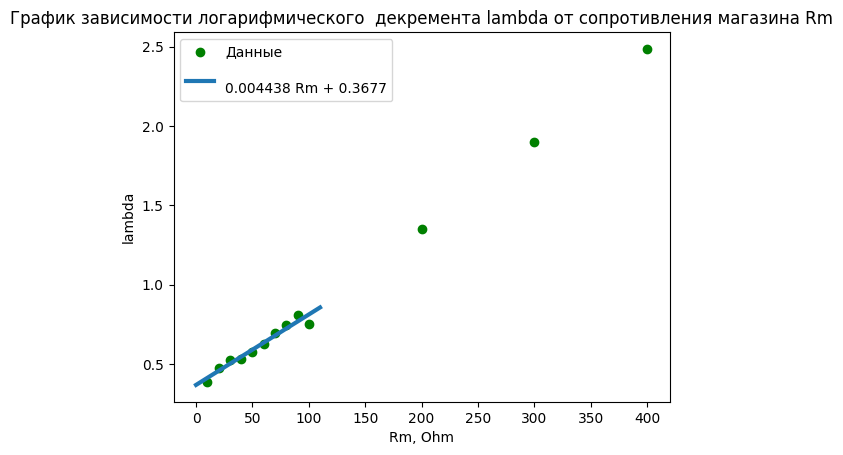

In [5]:
plt.scatter(data_1["Rm, Ohm"], data_1["lambda"], label = "Данные", color ='g', linewidth = 1)

# print(data_1["Rm, Ohm"].iloc[0:10])
fit = np.polyfit(data_1["Rm, Ohm"].iloc[0:10], data_1["lambda"].iloc[0:10], 1 )
line = np.poly1d(fit)
x = np.linspace(0, 110)

plt.plot(x, line(x), label=f"{line}".replace('x', 'Rm'), linewidth = 3)

R0 = abs(fit[1]/fit[0])

plt.xlabel("Rm, Ohm")
plt.ylabel("lambda")
plt.title("График зависимости логарифмического  декремента lambda от сопротивления магазина Rm")
plt.legend()
print(line)

In [6]:
R0 

82.84922800626234

Вычисление общего сопротивления и индуктивности для R = 10...100 Ом 

In [7]:
table_consts

,"C1, F","C2, F","C3, F","C4, F",dC1,dC2,dC3,dC4,"L, H",dL,"f, Hz"
0,2.200000e-08,3.300000e-08,4.700000e-08,4.700000e-07,2.200000e-09,3.300000e-09,4.700000e-09,4.700000e-08,0.01,0.001,40


In [8]:
R = R0 + data_1["Rm, Ohm"]
L =  (np.pi * data_1["R, Ohm"].iloc[0:10]) ** 2 * table_consts["C1, F"].to_numpy() / data_1["lambda"].iloc[0:10] ** 2

data_1["R, Ohm"] = R
data_1["L, H"] = L

In [12]:
data_1

,"Rm, Ohm","T, s","2Ui, ticks","2Ui+n, ticks",N,lambda,Q,"R, Ohm","L, H"
0,10,0.00008,5.2,2.4,2,0.386595,NaN,92.849228,0.000156
1,20,0.00008,10.0,2.4,3,0.475705,NaN,102.849228,0.000398
2,30,0.00008,9.6,2.0,3,0.522872,NaN,112.849228,0.000732
3,40,0.00008,9.2,3.2,2,0.528026,NaN,122.849228,0.001269
4,50,0.00008,8.8,2.8,2,0.572566,NaN,132.849228,0.001680
5,60,0.00008,8.4,2.4,2,0.626381,NaN,142.849228,0.002017
6,70,0.00008,8.0,2.0,2,0.693147,NaN,152.849228,0.002238
7,80,0.00008,7.6,3.6,1,0.747214,NaN,162.849228,0.002512
8,90,0.00008,7.2,3.2,1,0.810930,NaN,172.849228,0.002696
9,100,0.00008,6.8,3.2,1,0.753772,NaN,182.849228,0.003850


In [11]:
L.mean()

0.0017548415063718854

##  Сохранение в файл всех новых данных

In [67]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(NAME_OF_EXCEL)

data_1.to_excel(writer, index=False, sheet_name='table1')
data_2.to_excel(writer, index=False, sheet_name='table2')
table_consts.to_excel(writer, index=False, sheet_name='consts')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

/var/folders/4m/cdm9j52s2fs9_8ccjqtb1sy00000gn/T/ipykernel_27799/1270109265.py:9: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()
